In [2]:
import os
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\sales_data_sample.csv", encoding='latin1')

In [7]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [8]:
df.dropna(inplace=True)

In [11]:
print(df['ORDERDATE'].dtype) 

datetime64[ns]


In [13]:
df['Month'] = df['ORDERDATE'].dt.month

In [17]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5268\1087095410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


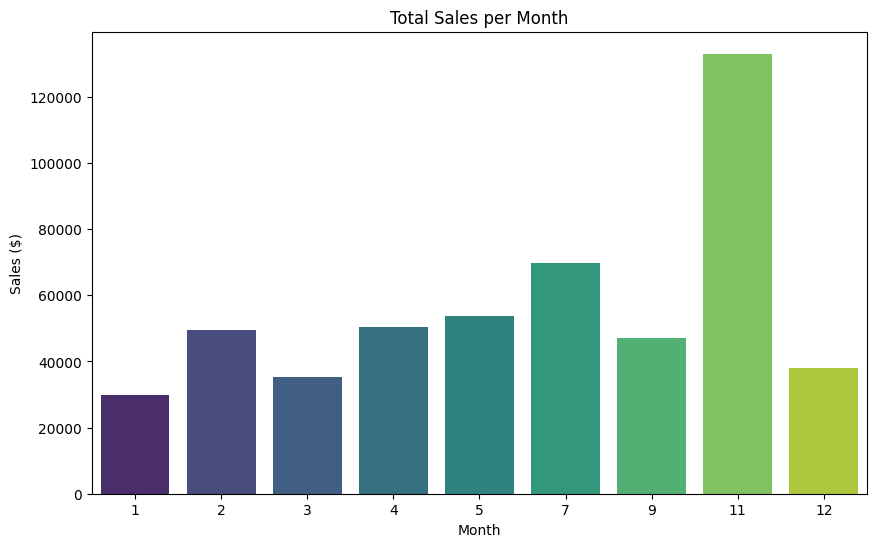

In [19]:
monthly_sales = df.groupby('MONTH_ID')['SALES'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title("Total Sales per Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show();


C:\Users\hp\AppData\Local\Temp\ipykernel_5268\3145772214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="magma")


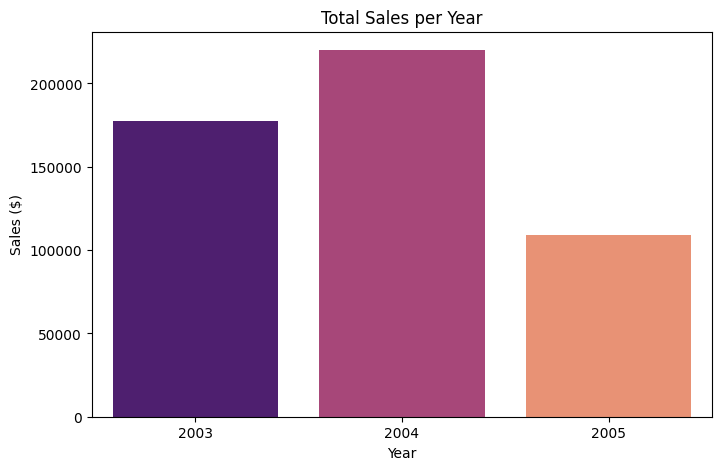

In [20]:
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="magma")
plt.title("Total Sales per Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.show()


In [21]:
aov = df.groupby('ORDERNUMBER')['SALES'].sum().mean()
print(f"Average Order Value (AOV): ${aov:.2f}")

Average Order Value (AOV): $38966.35


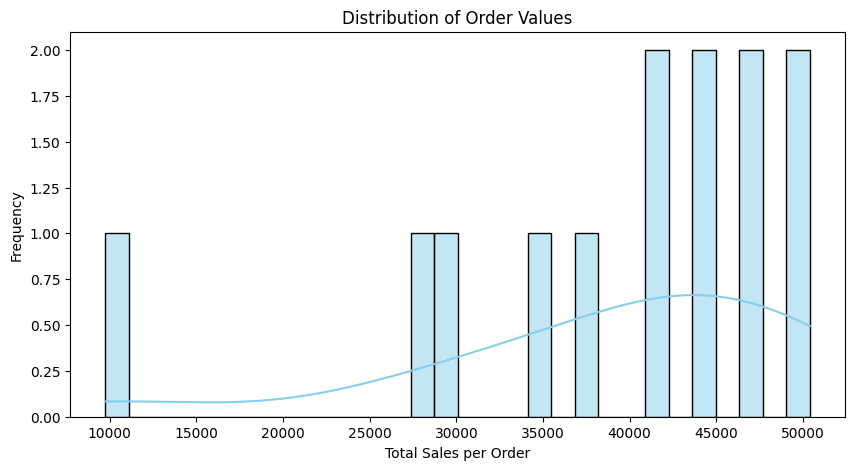

In [22]:
order_values = df.groupby('ORDERNUMBER')['SALES'].sum()

plt.figure(figsize=(10,5))
sns.histplot(order_values, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Order Values")
plt.xlabel("Total Sales per Order")
plt.ylabel("Frequency")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5268\3531493346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_sales.index, y=line_sales.values, palette='coolwarm')


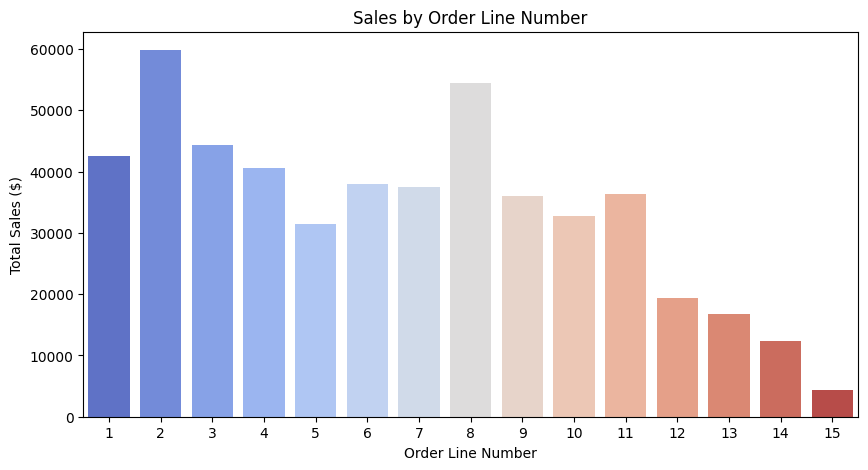

In [23]:
line_sales = df.groupby('ORDERLINENUMBER')['SALES'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=line_sales.index, y=line_sales.values, palette='coolwarm')
plt.title("Sales by Order Line Number")
plt.xlabel("Order Line Number")
plt.ylabel("Total Sales ($)")
plt.show()
